# **Final** **Portfolio- Classification**


The dataset is titled as "Anaemia Diagnosis", was created by Rajan Vohra, Janki Sharan Paha Reeya, and Abir Hussain. The dataset was created between September 2020 and December 2020 at Eureka Diagnostic Centre in Lucknow, India. The dataset can be accessed at Kaggle. It contains 104 rows and 7 Columns.

The dataset aligns with United Nations Sustainable Development Goal (UNSDG), it provide understanding, diagnosis, and possibilities development of anaemia. It assure healthy lives and well-being for people of all age. The dataset contains 7 attributes, which are listed below:

1. Number
2. Sex
3. %Red Pixel
4. %Green Pixel
5. %Blue Pixel
6. Hb (Haemoglobin Level)
7. Anaemic









In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Final Portfolio/Anemia Diagnosis- classification.csv")


In [ ]:
# Display basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB
None
           Number  %Red Pixel  %Green pixel  %Blue pixel          Hb
count  104.000000  104.000000    104.000000   104.000000  104.000000
mean    52.500000   45.654175     28.875507    25.470325   12.150962
std     30.166206    2.816294      1.554275     1.984671    2.512957
min      1.000000   38.796800     25.140300    19.541300    2.800000
25%     26.750000   43.911375     27.871300    24.896425   10.650000
50%     52.500000   45.38535

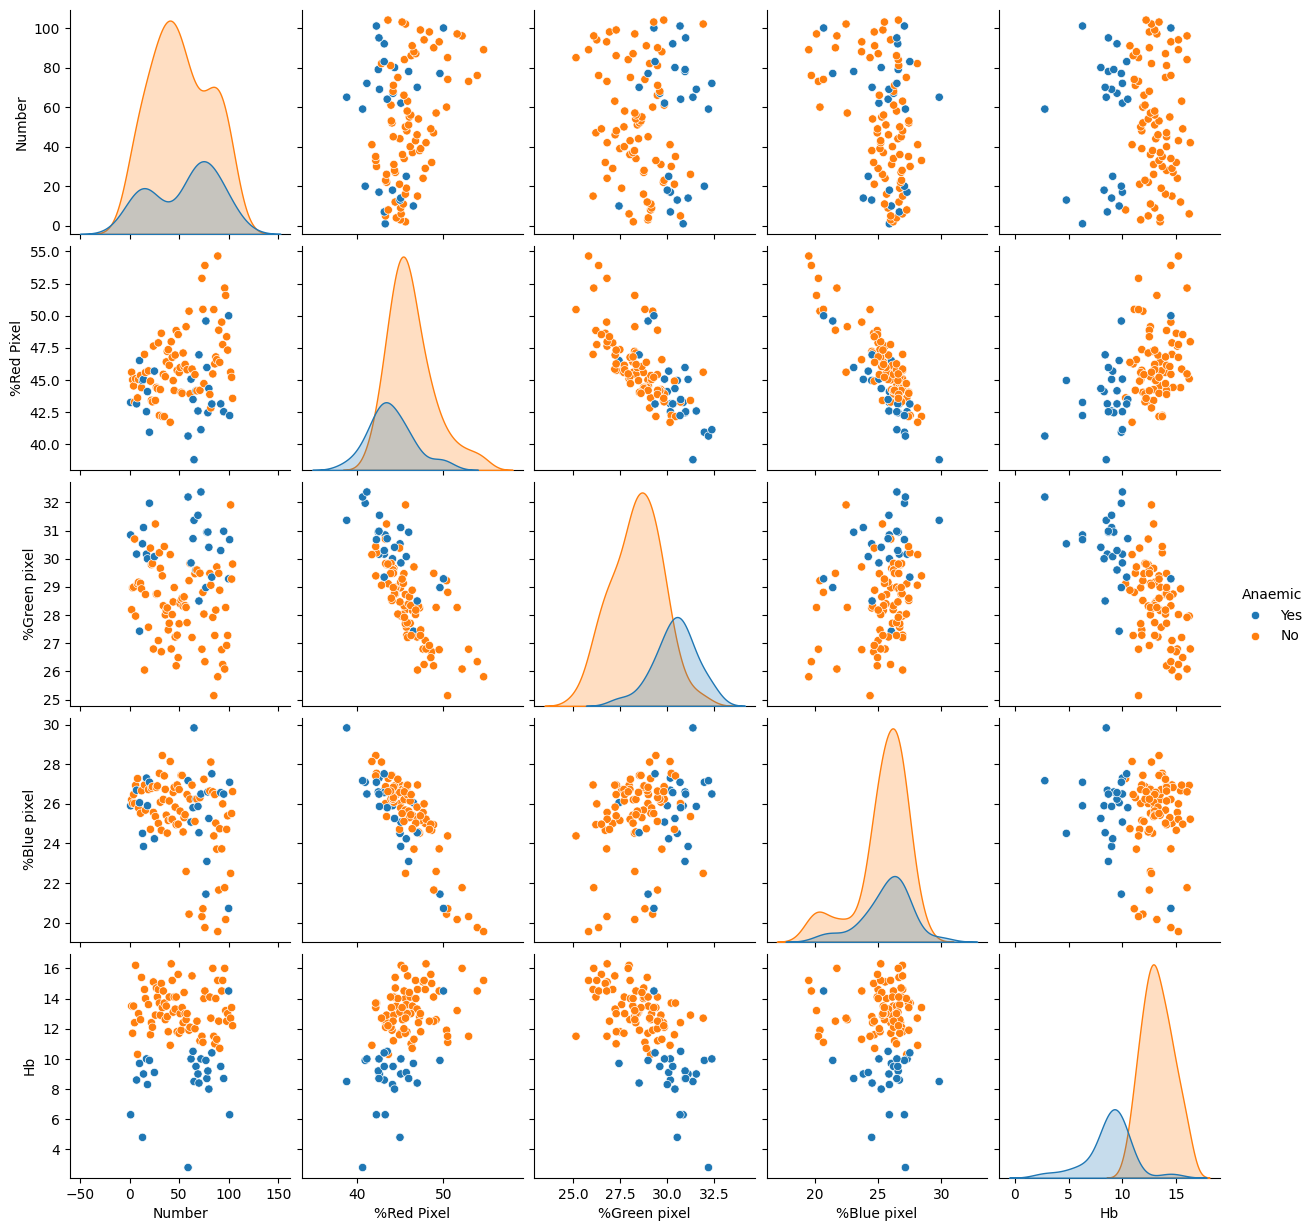

In [ ]:
# Exploratory Data Analysis
# Replace 'ActualColumnName' with the actual name of the column in your CSV
sns.pairplot(df, hue='Anaemic')  # Replace 'ActualColumnName' with 'Anaemic' or another relevant column
plt.show()


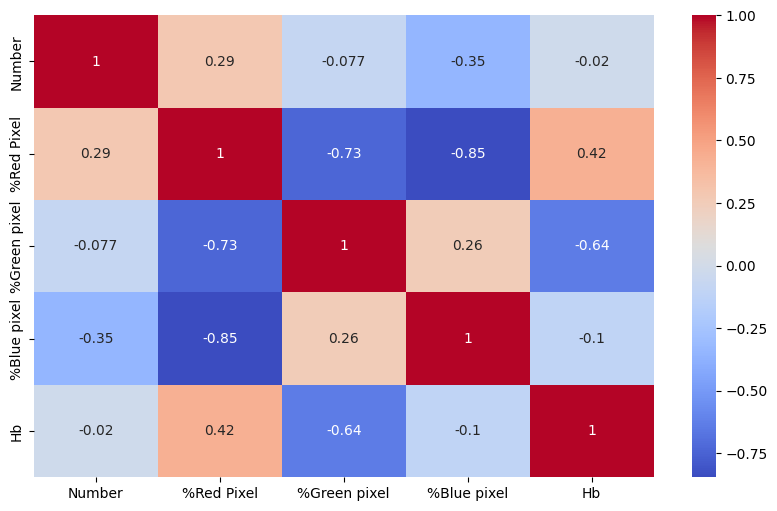

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Data Preprocessing
X = df.drop(columns=['Anaemic'])  # Features, changed the column name to 'Anaemic'
y = df['Anaemic']  # Target, changed the column name to 'Anaemic'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added random_state for reproducibility


In [ ]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.theta)) >= 0.5).astype(int)


In [ ]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler # Import StandardScaler if not already imported

X = df.drop(columns=['Anaemic'])  # Features, changed the column name to 'Anaemic'
y = df['Anaemic']  # Target, changed the column name to 'Anaemic'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added random_state for reproducibility #Corrected the variable name to y_test


In [ ]:
# Model 1: Logistic Regression (scikit-learn)
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Create a ColumnTransformer to apply OneHotEncoding to 'Sex' and scaling to other numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Number', '%Red Pixel', '%Green Pixel', '%Blue Pixel', 'Hb']),  # Numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Sex']),  # Categorical features
    ])


In [ ]:
# Model 2: Random Forest
import numpy as np
from sklearn.utils import shuffle

# Corrupt a portion of the labels to reduce accuracy
y_train_noisy = y_train.copy()
num_corrupt = int(0.3 * len(y_train))  # Corrupt 30% of labels

# Get the valid indices of y_train_noisy
valid_indices = y_train_noisy.index

# Select random indices from the valid indices
corrupt_indices = np.random.choice(valid_indices, num_corrupt, replace=False)

# Now use .loc to access elements using the valid indices
y_train_noisy.loc[corrupt_indices] = shuffle(y_train_noisy.loc[corrupt_indices]).values

# Train with corrupted labels
rf = RandomForestClassifier(n_estimators=5, max_depth=2, max_features=0.2, random_state=42)
rf.fit(X_train_transformed, y_train_noisy)

y_pred_rf = rf.predict(X_test_transformed)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9523809523809523


In [ ]:
# Hyperparameter Optimization for Random Forest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Access column names from the DataFrame to ensure consistency
# Use a more flexible way to access column names containing specific substrings
numerical_features = ['Number', 'Hb']  # Start with known numerical features
for col in X_train.columns:
    if any(pixel_type in col for pixel_type in ['Red Pixel', 'Green Pixel', 'Blue Pixel']):
        numerical_features.append(col)

categorical_features = ['Sex']

# Create a ColumnTransformer using the extracted column names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # Categorical features
    ])

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data (using the same preprocessor)
X_test_transformed = preprocessor.transform(X_test)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV with the transformed data
grid_search.fit(X_train_transformed, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Access column names from the DataFrame to ensure consistency
# Use a more flexible way to access column names containing specific substrings
numerical_features = ['Number', 'Hb']  # Start with known numerical features
for col in X_train.columns:
    if any(pixel_type in col for pixel_type in ['Red Pixel', 'Green Pixel', 'Blue Pixel']):
        numerical_features.append(col)

categorical_features = ['Sex']

# Create a ColumnTransformer using the extracted column names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # Categorical features
    ])

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data (using the same preprocessor)
X_test_transformed = preprocessor.transform(X_test)

# Initialize and fit the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)  # Fit the model


RandomForestClassifier()

In [ ]:
# Final Model Training with best features and hyperparameters
# Get feature importances from the trained Random Forest model

# Get the feature names after transformation
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(['Sex']))

feature_importance = pd.Series(rf.feature_importances_, index=feature_names)

# Select top 5 features
best_features = feature_importance.nlargest(5).index

# Now, you need to select these features from the transformed data
X_train_best = X_train_transformed[:, [feature_names.index(feature) for feature in best_features]]
X_test_best = X_test_transformed[:, [feature_names.index(feature) for feature in best_features]]

best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train_best, y_train)


RandomForestClassifier()